# Customer Churn Prediction

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings("ignore")

In [41]:
df=pd.read_csv("Churn_Modelling.csv")

In [42]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df.shape

(10000, 14)

In [44]:
# 0 means who stayed
# 1 means who left
df['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [46]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [47]:
df_numerical=df[['CreditScore','Age','Balance','EstimatedSalary','Exited']]

df_categorical=df[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']]

df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


# EXPLORATORY DATA ANALYSIS(EDA)

<b>We gonna do two types of analysis,</b>

<b>1.]</b> Univariate.

<b>2.]</b> Bivariate.

# 1] First we will see 'Univariate Analysis':

<b>1.</b> Histogram

<b>2.</b> PDF

<b>3.</b> Box Plot

<b>4.</b> Violin Plot

# EDA For Numerical Features:

<b>We Are Going To See Numerical Features Of EDA:</b>

In [48]:
df_numerical.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited'], dtype='object')

# EDA Analysis of 'CREDIT SCORE' Feature:

# Histogram of 'Credit Score':

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

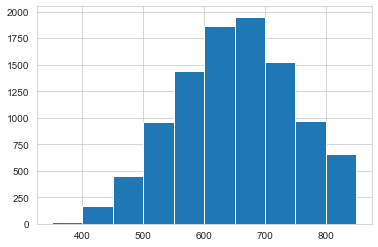

In [49]:
plt.hist(df_numerical['CreditScore'])

# Observation
  
<b>1)</b> This <b>Graphical representation of Credit Score shows us normal distribution curve</b>, 
   
<b>2)</b> means most of the people have <b>credit score between 600 to 700.</b>
    
<b>3)</b> There are some less people have <b>credit score is more than 800 and less than 400.</b>

# PDF Of 'Credit Score':

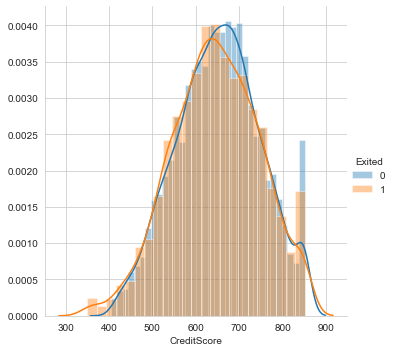

In [50]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(sns.distplot, "CreditScore")\
   .add_legend();
plt.show();

# Observation
<b>First of all ,Here (0) means who Stays and (1) means who left.</b>
    
<b>1)</b>From above representation we can say that,there is a pattern in the customer who have a <b>credit score
    
   less than 400</b> and its observed that they are leaving. <b>42% data of those people who stay</b>.
    
   40% data of  people leaving the bank having <b>credit score lies in between 600 to 700 region.</b>
     
   which are shown in above graph.
    
<b>2)</b>This called as a<b>'Smoothing of Histogram'.</b>


# Box Plot of 'Credit Score':

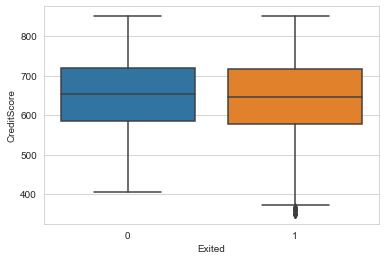

In [51]:
sns.boxplot(x='Exited',y='CreditScore', data=df_numerical)
plt.show()

# Observation

<b>a) For customers Who Staying in Bank(0):</b>
    
<b>--</b> In This Graphical Representation box plot shows us,<b> 25% of staying people in bank having Credit Score less than 580(CS<580).</b>

<b>--</b> 50% of staying people in bank having Credit Score less than 650(CS < 650).
   
<b>--</b> 75% of staying people in bank having Credit Score less than 720(CS < 720).
    
   
<b>b) For customers Who Left The Bank(1):</b>
   
<b>--</b> In This Graphical Representation box plot shows us, 25% of left people in bank having Credit Score 
 less than 580(CS<580).
   
<b>--</b> 50% of left people in bank having Credit Score less than 650(CS < 650).

   
<b>--</b> 75% of left people in bank having Credit Score less than 720(CS < 720).

# Violin Plot of 'Credit Score':

<function matplotlib.pyplot.show(close=None, block=None)>

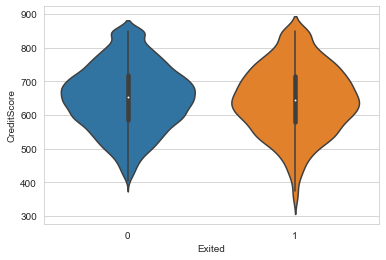

In [52]:
sns.violinplot(x='Exited',y='CreditScore',data=df_numerical)
plt.show

# EDA Analysis of  'Age' Feature:

# Histogram of 'Age'

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

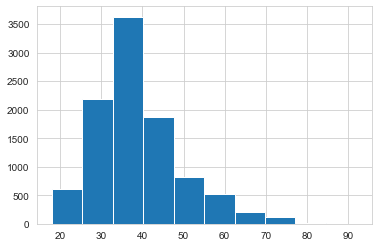

In [53]:
plt.hist(df_numerical['Age'])

# Observation
 
<b>1)</b>In This graphical representation it shows that, the majority of the customers whose<b> age between 30 to 40 is very high.</b>
    
<b>2)</b>This graph is also <b>slightly skewed to the right side</b> which are having less credit score.

# PDF Of 'Age':

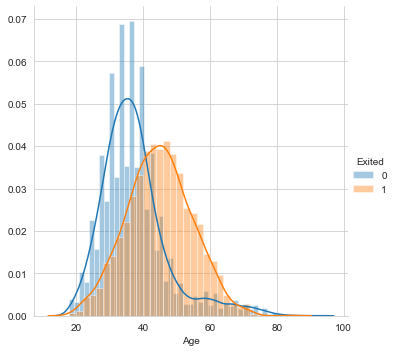

In [54]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(sns.distplot, "Age")\
   .add_legend();
plt.show();

# Observation

<b> 1)</b> In this graphical representation,<b> X-axis show us age of customer</b> and<b> Y-axis shows us a Density of a customer.</b>

<b> 2)</b> Here blue bar suggest of customer, who stay in the bank and Red bar suggest of customer, who left the bank.

<b> 3)</b> So,<b> 70% of the customers are in the age between 20 to 40</b> and starts exiting from the Bank after the age of 40.

<b> 4)</b> After the age of 40,there is increase in customer leaving the bank.

# Box Plot Of 'Age':

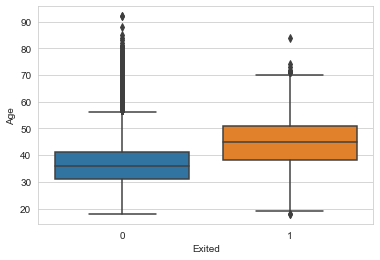

In [55]:
sns.boxplot(x='Exited',y='Age', data=df_numerical)
plt.show()

# Observation

<b>1) For customers who Staying in bank (Exited = 0):</b>

<b>--</b> This graphical representation shows us,<b>25% of staying people in bank having age less than 32(age < 32).</b>

<b>--</b> 50% of staying people in bank having <b>age less than 35(age < 35) and 75% of staying people in bank having age less than 42(age < 42).</b>

<b>--</b> The top horizontal line represent the maximum age of the customer.

<b>For customers who left the bank (Exited = 1):</b>

<b>--</b>This graphical representation shows us,<b> 25% of left people in bank having age less than 38(age < 38).</b>
                                                                                  
<b>--</b>50% of left people in bank having<b> age less than 45(age < 45) and 75% of left people in bank having age less than 52(age < 52).</b>

# Violin Plot Of 'Age':

<function matplotlib.pyplot.show(close=None, block=None)>

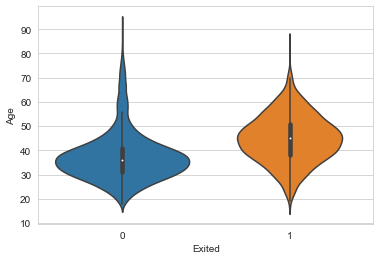

In [56]:
sns.violinplot(x='Exited',y='Age',data=df_numerical)
plt.show

# EDA Analysis of  'Balance' Feature:

# Histogram of 'Balance':

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

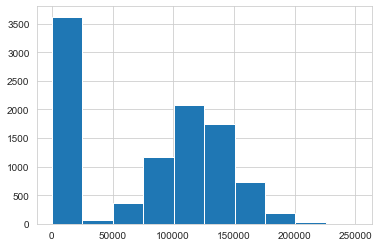

In [58]:
plt.hist(df_numerical['Balance'])

# Observation

<b>1)</b>This graphical representation shows us, A balance of customers in the bank and these are shown in<b> X-axis.
   
   Y-axis shows us a count of people.</b>

<b>2)</b> The people has balance between<b> 0 to 25000rs</b> and the next one is the balance people has is between 

   <b>100000 to 150000</b> And there are very less people have more than balance of 200000.

# PDF of 'Balance':

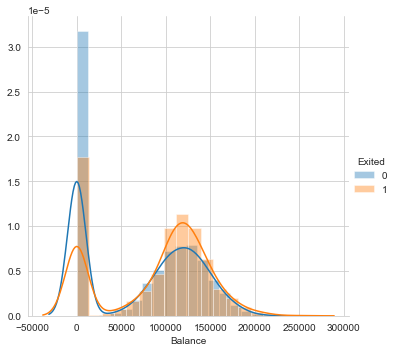

In [59]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(sns.distplot, "Balance")\
   .add_legend();
plt.show();

# Observation

<b>1)</b> In this graphical representation, The balance of customer,b> who left is normal and also their bank balance is 0.</b>

<b>2)</b><b> 17% for the customers who left</b> , and<b> 32% for the customer who stayed at Bank. </b>

# Box Plot Of 'Balance';

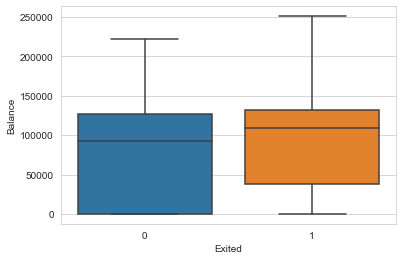

In [60]:
sns.boxplot(x='Exited',y='Balance', data=df_numerical)
plt.show()

# Observation

<b>  1) For customer who Staying in bank (0):</b>

<b>--</b> The graph of box plot shows us a ,<b> 25% of staying people in bank having balance less than 0 to 50000(balance 0 < 50000).</b>   
   
<b>--</b> 50% of staying people in bank having balance less than 85000(balance < 85000).
          
<b>--</b> 75% of staying people in bank having balance less than 125000(balance < 125000). The top horizontal line represent the maximum age of the customer.</b>

<b>  2) For customer who left the bank (1):</b>

<b>--</b>  The graph of box plot shows us a,<b> 25% of left people in bank having balance less than 45000(balance < 45000).</b> 
    
<b>--</b>  50% of left people in bank having balance less than 110000(balance < 110000).<b>
    
<b>--</b>75% of left people in bank having balance less than 125000(balance < 125000).</b>

# Violin PLot OF 'Balance':

<function matplotlib.pyplot.show(close=None, block=None)>

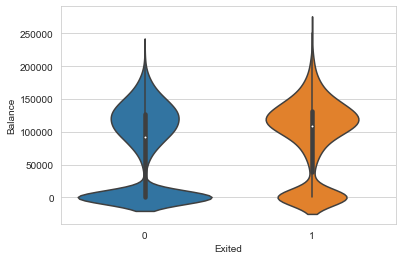

In [61]:
sns.violinplot(x='Exited',y='Balance',data=df_numerical)
plt.show

# EDA Analysis of 'EstimatedSalary' Feature:

# Histogram of 'EstimatedSalary':

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <BarContainer object of 10 artists>)

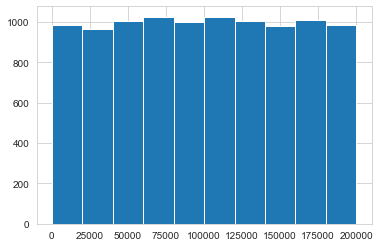

In [62]:
plt.hist(df_numerical['EstimatedSalary'])

# Observation


<b>1)</b> In this graphical representation we can see that,<b> there is a quiet fairly distibution of number of people having 
   salary  range between 0 and 200000.
    

<b>2)</b> Means equal number of people having salaries for each category having balance between 0 to 200000.

# PDF Of 'EstimatedSalary':

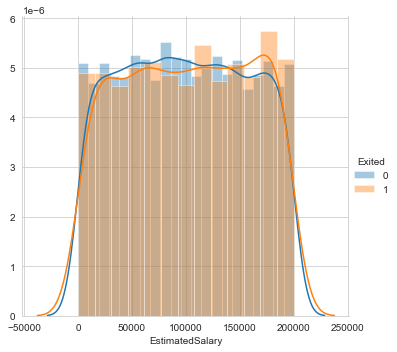

In [63]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(sns.distplot, "EstimatedSalary")\
   .add_legend();
plt.show();

# Observation

<b>1)</b> This graphical representation shows us a ,<b> increaseness in the people staying in bank as well as people leaving the bank 
    
with the increase in salary</b>.

<b>2)</b> Means<b> 50% staying in Bank and 50% leaving the bank.</b> There is an 5% increase in people leaving 
    
the bank after the estimated salary of 150000.

# Box PLot of 'EstimatedSalary':

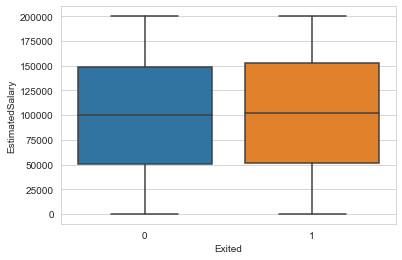

In [64]:
#BOX PLOT:-

sns.boxplot(x='Exited',y='EstimatedSalary', data=df_numerical)
plt.show()

# Observation

<b> 1)For customers who staying in bank (0):</b>

<b>--</b> This graph shows us a ,<b> 25% of staying people in bank having estimatedSalary less than 50000(estimatedSalary < 50000).</b>
  
 50% of staying people in bank having EstimatedSalary less than 100000(EstimatedSalary < 100000) and 75% of staying people in 
  
  bank having EstimatedSalary less than 150000(EstimatedSalary < 150000).
  

<b> 2)For customer who left the bank (1):</b>

<b>--</b> This graph shows us a ,<b> 25% of left people in bank having EstimatedSalary less than 51000(EstimatedSalary < 51000).</b>

   50% of left people in bank having EstimatedSalary less than 110000(EstimatedSalary < 110000) and 75% of left people
   
   in bank having EstimatedSalary less than 151000(EstimatedSalary < 151000).</b>

# Violin Plot of 'EstimatedSalary':

<function matplotlib.pyplot.show(close=None, block=None)>

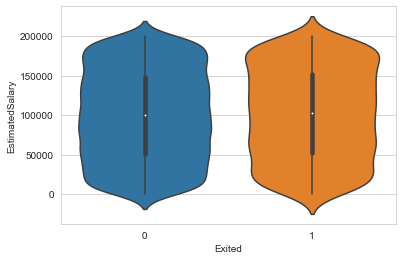

In [65]:
sns.violinplot(x='Exited',y='EstimatedSalary',data=df_numerical)
plt.show

# EDA FOR CATEGORICAL FEATURES
We Are Going To See Categorical Features Of EDA:

In [66]:
df_categorical.columns

Index(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [67]:
df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


# EDA Analysis of 'Geography' Feature:

# Histogram of 'Geography'

(array([5014.,    0.,    0.,    0.,    0., 2477.,    0.,    0.,    0.,
        2509.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

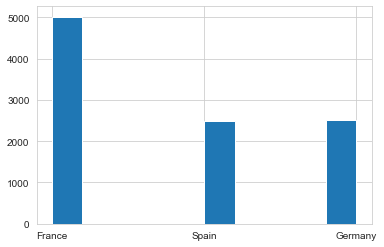

In [68]:
plt.hist(df_categorical['Geography'])

# Observation

<b>--</b>  This graphical representation shows us,That most of the <b>customers are staying in france and equal number
    
of customers are staying in spain and germany.</b>

# One Hot Encoding
<b>One hot encoding means convert the categorical features into numerical features.</b>

In [69]:
categorical = ['Geography','Gender']
df_categorical = pd.get_dummies(df_categorical, columns=categorical, drop_first=False)
df_categorical

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2,1,1,1,1,1,0,0,1,0
1,1,1,0,1,0,0,0,1,1,0
2,8,3,1,0,1,1,0,0,1,0
3,1,2,0,0,0,1,0,0,1,0
4,2,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,1,0,0,0,1
9996,10,1,1,1,0,1,0,0,0,1
9997,7,1,0,1,1,1,0,0,1,0
9998,3,2,1,0,1,0,1,0,0,1


# EDA Analysis of 'Geography_France' Feature:

# PDF of 'Geography_France' :

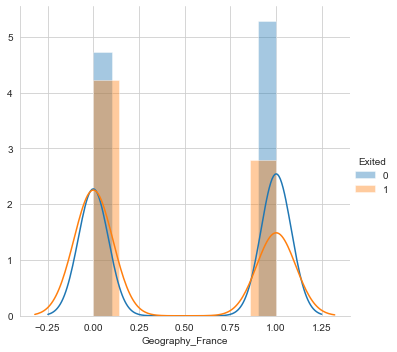

In [70]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "Geography_France")\
   .add_legend();
plt.show();

# Observation

<b>1)</b>  This graphically represenation shows us, For the France Location,<b> There are more number of customers having 1 number of    

product staying with Bank.</b>
    
<b>2)</b>  25% of the customers having 1 number of product prefer staying with Bank whereas<b> 15% wants to left the Bank.</b>

<b>3)</b>  There is little<b> Equal distribution in the customers which are  staying or leaving the bank with No of product 0. </b>

# Box Plot of 'Geography_France' ;

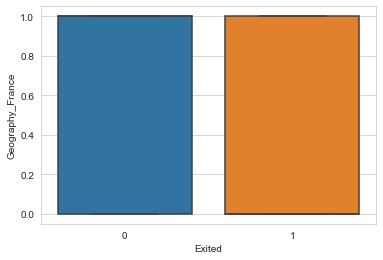

In [71]:
sns.boxplot(x='Exited',y='Geography_France', data=df_categorical)
plt.show()

# Observation

<b>--</b>  In This graphical representations,There is a<b> equal Distribution of customers who wants to stay or left from the Bank.</b>

# Violin Plot of 'Geography_France':

<function matplotlib.pyplot.show(close=None, block=None)>

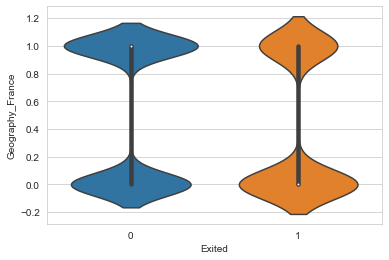

In [72]:
sns.violinplot(x='Exited',y='Geography_France',data=df_categorical)
plt.show

# EDA Analysis of 'Geography_Germany' Feature:

# PDF of 'Geography_Germany':

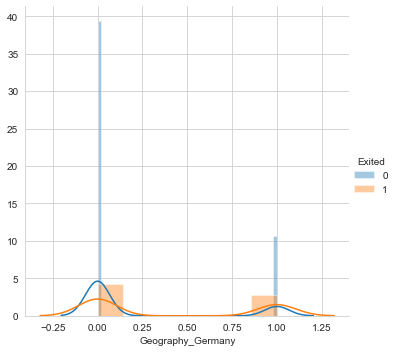

In [74]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "Geography_Germany")\
   .add_legend();
plt.show();

# Observation

<b>1)</b> This grahical representation shows us, For the location Germany So there are<b> 5% of customers wants to staying.</b>

<b>2)</b><b> Bank and 3% of customers are wants to left the Bank.</b>

# Box Plot of 'Geography_Germany':

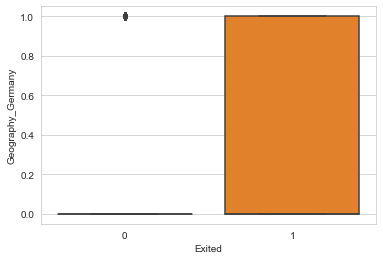

In [75]:
sns.boxplot(x='Exited',y='Geography_Germany', data=df_categorical)
plt.show()

# Observation

<b>--</b>  This graphical representations shows us, For the location Germany,<b> 75% of customers wants to left the Bank.</b> 

# Violin Plot of 'Geography_Germany':

<function matplotlib.pyplot.show(close=None, block=None)>

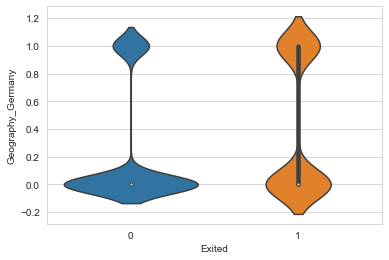

In [76]:
sns.violinplot(x='Exited',y='Geography_Germany',data=df_categorical)
plt.show

# EDA Analysis of 'Geography_Spain' Feature:

# PDF of 'Geography_Spain':

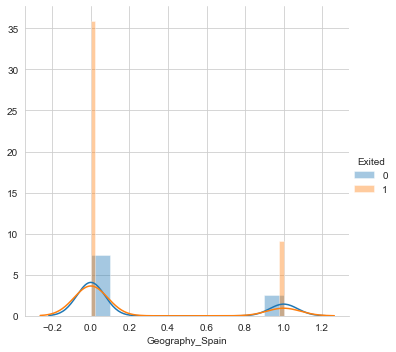

In [77]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "Geography_Spain")\
   .add_legend();
plt.show();

# Observation

<b>1)</b>  This graphical representation shows us, For the Geographical Location of Spain,<b> there is uniform distribution of customers.</b> 

<b>2)</b>  which are staying in the bank or leaving the bank.<b> There is 5% of customers either prefer staying with bank or 


  leaving the bank for the non active member.</b>

# Box Plot of 'Geography_Spain':

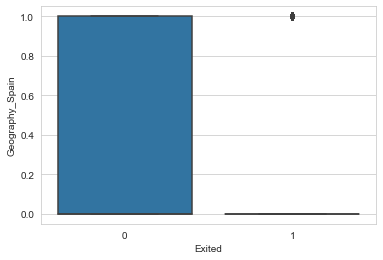

In [78]:
sns.boxplot(x='Exited',y='Geography_Spain', data=df_categorical)
plt.show()

# Observation

<b>--</b>  This graphical representaton shows us, For the Location Spain,<b> 25% to 75% customers wants to prefer staying with Bank.</b>

# Violin Plot of 'Geography_Spain':


<function matplotlib.pyplot.show(close=None, block=None)>

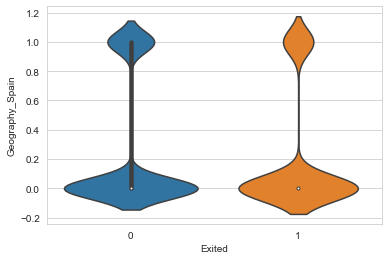

In [79]:
sns.violinplot(x='Exited',y='Geography_Spain',data=df_categorical)
plt.show

# EDA Analysis of 'Gender' Feature:

# PDF of 'Gender_Female':

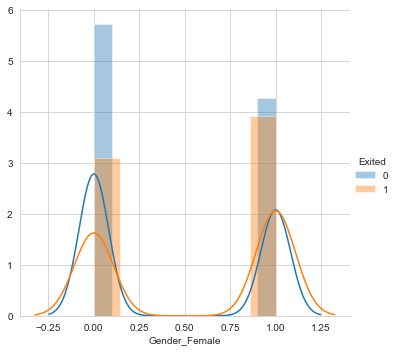

In [80]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "Gender_Female")\
   .add_legend();
plt.show();

# Observation

<b>--</b>  This graphical representations shows us,<b> 28% female wants to stay with bank and 15% female wants to left from the bank.</b>

# Box Plot of 'Gender_Female':

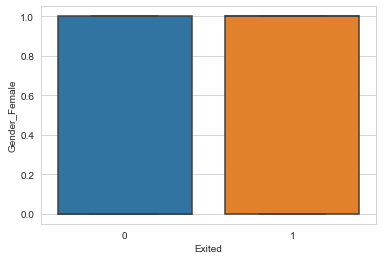

In [81]:
sns.boxplot(x='Exited',y='Gender_Female', data=df_categorical)
plt.show()

# Observation

<b>--</b>  This graphical representation shows us,<b> The equal Distribution of gender female which are wants to stay or left from the Bank.</b>

# Violin Plot of 'Gender_Female':

<function matplotlib.pyplot.show(close=None, block=None)>

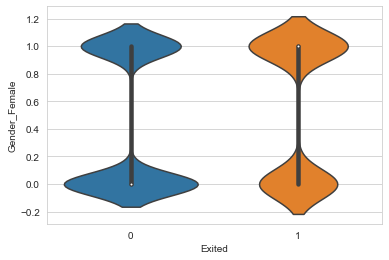

In [82]:
sns.violinplot(x='Exited',y='Gender_Female',data=df_categorical)
plt.show

# EDA Analysis of 'Gender_Male' Feature:

# PDF of 'Gender_Male' :

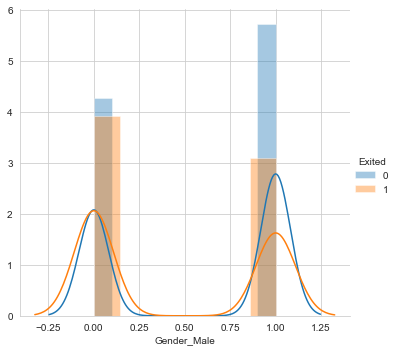

In [83]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "Gender_Male")\
   .add_legend();
plt.show();

# Observation

<b>--</b> This graphical reresentation shows us,<b> The 28% male wants to stay</b> with bank and<b> 15% male wants to left from bank.</b>

# Box Plot of 'Gender_Male' :

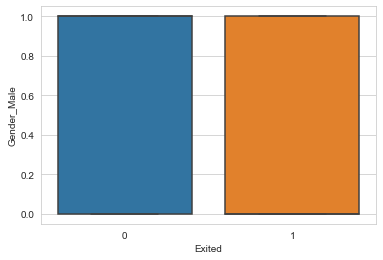

In [84]:
sns.boxplot(x='Exited',y='Gender_Male', data=df_categorical)
plt.show()

# Observation

<b>--</b>  This graphical representations shows us, <b>The equal Distribution of gender male who wants to stay or left from the Bank.</b>

# Violin Plot of 'Gender_Male' :

<function matplotlib.pyplot.show(close=None, block=None)>

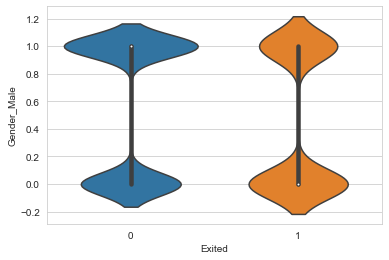

In [85]:
sns.violinplot(x='Exited',y='Gender_Male',data=df_categorical)
plt.show

# EDA Analysis of 'Tenure' Feature:

# Histogram of 'Tenure':

(array([ 413., 1035., 1048., 1009.,  989., 1012.,  967., 1028., 1025.,
        1474.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

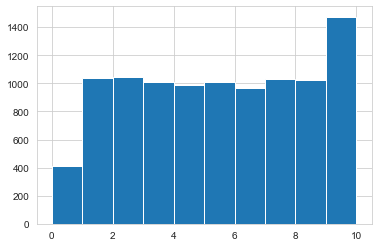

In [86]:
plt.hist(df_categorical['Tenure'])

# Observation

<b>1)</b> This graph tell us, There are<b> less customer having tenure between 0 to 1.</b>

<b>2)</b> After next<b> 9-10 years shows customer have maximum tenure. </b>

# PDF of 'Tenure':

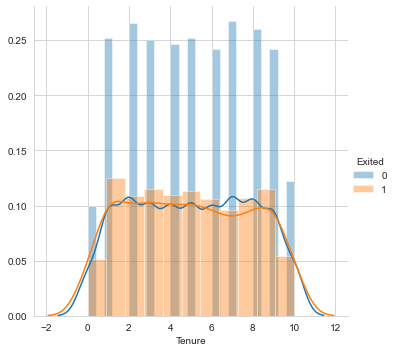

In [87]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "Tenure")\
   .add_legend();
plt.show();

# Observation

<b>1)</b>  This graph represent that,<b>25 % of the People having tenure 0 to 10 years stay in Bank.</b> 10% people leave the bank during this tenure.

<b>2)</b>  There is <b>decrease in percentage of people staying in Bank post 10years of tenure.</b>

# Box Plot of 'Tenure':

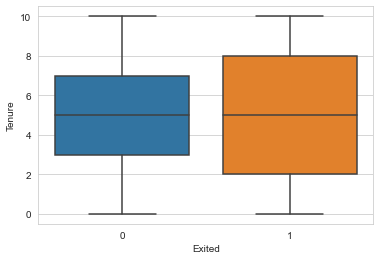

In [88]:
sns.boxplot(x='Exited',y='Tenure', data=df_categorical)
plt.show()

# Observation

<b> 1)For customers who Staying in bank (0):</b>
    
<b>--</b>  This graph of box plot shows us, 25% of staying people in bank having<b> Tenure less than 3(Tenure < 3).</b>

<b>--</b>  50% of staying people in bank having Tenure<b> less than 5(Tenure < 5).</b>

<b>--</b>  75% of staying people in bank having Tenure <b>less than 6.5(Tenure < 6.5).</b>

<b> 2)For customers who left the bank (1):</b>

<b>--</b>  This graph of box plot shows us, 25% of left people in bank having<b> Tenure less than 2(Tenure < 2).</b>

<b>--</b>  50% of left people in bank having<b> Tenure less than 5(Tenure < 5).</b>

<b>--</b>  75% of left people in bank having<b> Tenure less than 8(Tenure < 8).</b>

# Violin Plot of 'Tenure':

<function matplotlib.pyplot.show(close=None, block=None)>

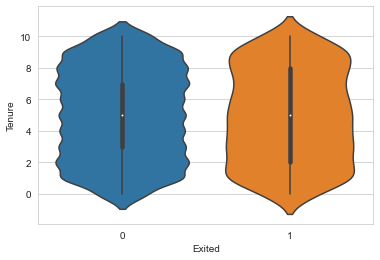

In [89]:
sns.violinplot(x='Exited',y='Tenure',data=df_categorical)
plt.show

In [90]:
import warnings
warnings.filterwarnings("ignore")
b=df_categorical['Tenure'].value_counts()
b

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

<AxesSubplot:>

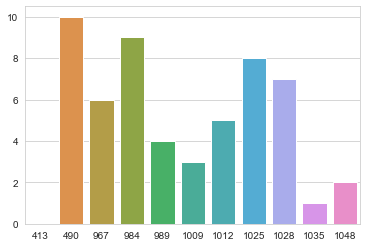

In [91]:
sns.barplot(x=b.values,y=b.index)

# Observation:

<b>from above graphical representation, We can see that--</b>

<b>1)</b> Most of the Customers have tenure 10.

<b>2)</b> Very less Customers have tenure between 1 to 2.

(-1.1058178224184918,
 1.1002770391627854,
 -1.1056794625804278,
 1.1052094675315791)

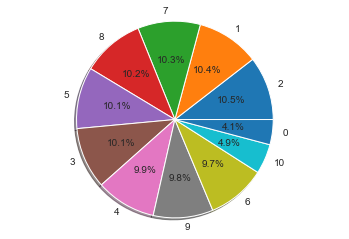

In [92]:
labels = b.index
sizes =b.values 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

# Observation

<b>From above graphical representation, We can see that--</b>

<b>1)</b> We can see in pie chart only 4.9% of the customers are having tenure of 10years.

<b>2)</b> 4.1% of customers have tenure of 0years. 

# EDA Analysis of 'NumOfProducts' Feature:

# Histogram of 'NumOfProducts':

(array([5084.,    0.,    0., 4590.,    0.,    0.,  266.,    0.,    0.,
          60.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

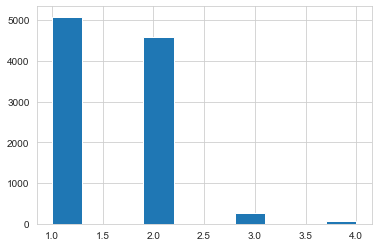

In [93]:
plt.hist(df_categorical['NumOfProducts'])

# Observation

<b>1)</b>  This graph representation that, The<b> Majority of the customers</b> have <b>buy only one product with the card.</b>

<b>2)</b> <b> Very less number of customers</b> have <b>bought more then 2 products.</b>

# PDF of 'NumOfProducts':

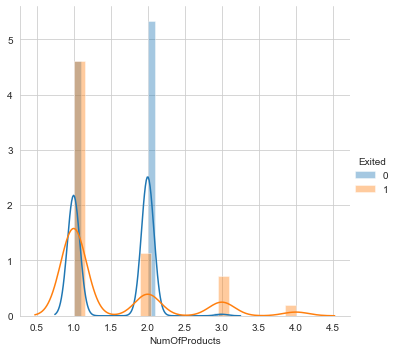

In [94]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "NumOfProducts")\
   .add_legend();
plt.show();

# Observations

<b>1)</b>  This Graphical representation shows us,<b> 22% of the customers having 1 product has stayed with the Bank.</b>
    
    
<b>2)</b> <b> 15% of this category has left the Bank,</b>And also we can see that the maximum customers of about <b>25% having 2 product prefer stayingwith the Bank.</b> 

<b>3)</b>  There is a decrease in people having 2 or more product leaving the Bank.</b>

# Box Plot of 'NumOfProducts':

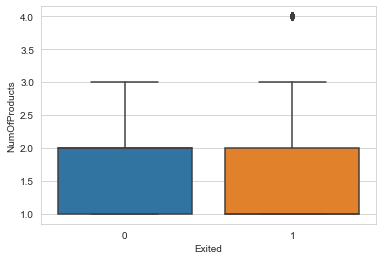

In [95]:
sns.boxplot(x='Exited',y='NumOfProducts', data=df_categorical)
plt.show()

# Observation

<b> 1) For customers who Staying in bank (0):</b>

<b>--</b>  This Graphical representation of box plot shows us,<b> 25% of staying people in bank having NumofProduct equal to                  1(NumofProduct = 1).</b>

<b>--</b> <b> 75% of staying people in bank having NumofProduct less than 2(NumofProduct < 2).</b>

<b> 2) For customers who left the bank (1):</b>

<b>--</b>  This Graphical representation of box plot shows us,<b> 25% of left people in bank having NumofProduct equal to 1 
    (NumofProduct = 1).</b>

<b>--</b> <b> 75% of leaving people in bank having NumofProduct less than 2(NumofProduct < 2).</b>

# Violin Plot of 'NumOfProducts':

<function matplotlib.pyplot.show(close=None, block=None)>

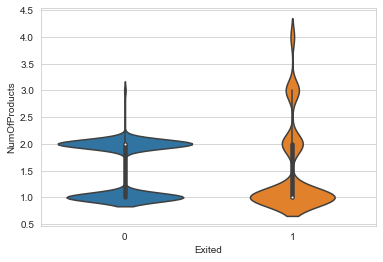

In [96]:
sns.violinplot(x='Exited',y='NumOfProducts',data=df_categorical)
plt.show

In [97]:
import warnings
warnings.filterwarnings("ignore")
a=df_categorical['NumOfProducts'].value_counts()
a

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<AxesSubplot:>

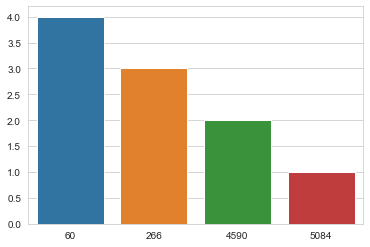

In [98]:
sns.barplot(x=a.values,y=a.index)

# Observation:

<b>--</b> From above grapical representation, we can see that, Maximum number of customers are buy just one product.

# EDA Analysis of 'HasCrCard' Feature:

# Histogram of 'HasCrCard':

(array([2945.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7055.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

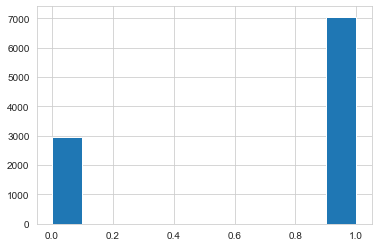

In [99]:
plt.hist(df_categorical['HasCrCard'])

# Observation

<b>--</b>  This graphical representation shows us, There are most of the<b> customers having only one credit card</b> otherwise <b>zero But no one has more than one card.</b>

# PDF of 'HasCrCard':

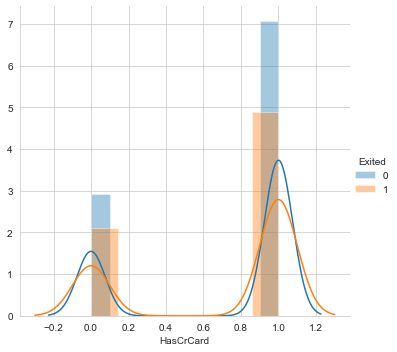

In [100]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "HasCrCard")\
   .add_legend();
plt.show();

# Observation

<b>1)</b>  This graphical representation of pdf shows us,<b> 40% of customers having one card and they staying with bank.</b> 

<b>2)</b>  <b>25% of cutomers having one card which are leaving from bank.</b>

# Box Plot of 'HasCrCard':

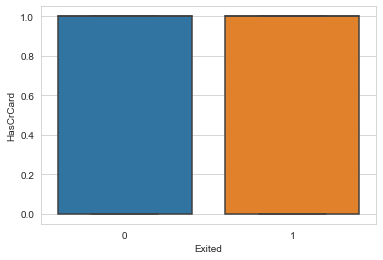

In [101]:
sns.boxplot(x='Exited',y='HasCrCard', data=df_categorical)
plt.show()

# Observation

<b> 1)For customers who, Staying in bank (0):</b>

<b>--</b>  This Graphical representation of box plot shows us,<b> more than 25% of customers having card they want to staying in bank.</b>         

<b>--</b>  <b>75%  of staying customers in bank has only one card.</b>

<b> 2)For customers who, left the bank(1):</b>

<b>--</b>  This Graphical representation of box plot shows us,<b> more than 25% of customers having card they want to leave from bank.</b>

<b>--</b>  75% of leaving customers in bank has only one card.

# Violin Plot of 'HasCrCard':

<function matplotlib.pyplot.show(close=None, block=None)>

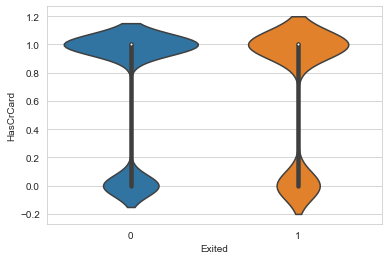

In [102]:
sns.violinplot(x='Exited',y='HasCrCard',data=df_categorical)
plt.show

# EDA Analysis of 'IsActiveMember' Feature:

# Histogram of 'IsActiveMember':

(array([4849.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5151.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

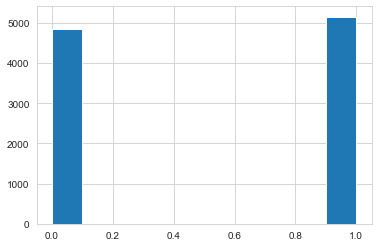

In [103]:
plt.hist(df_categorical['IsActiveMember'])

# Observation

<b>--</b>  This graphical representation shows us,<b> How many customer are active or not</b>, So we can see that ,<b>there are slightly more active people in bank.</b>


In [104]:
warnings.filterwarnings("ignore")
b=df_categorical['HasCrCard'].value_counts()
b

1    7055
0    2945
Name: HasCrCard, dtype: int64

<AxesSubplot:>

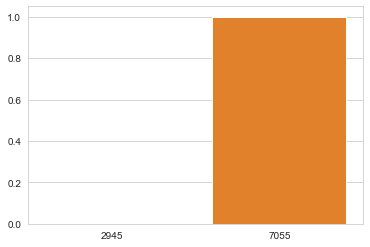

In [105]:
sns.barplot(x=b.values,y=b.index)

# Observation

<b>--</b> From above graph , we can see that,2945 Customers do have credit card and 7055 don't.

(-1.1179836976946826,
 1.1008563665568896,
 -1.1127024981118583,
 1.1140147351863388)

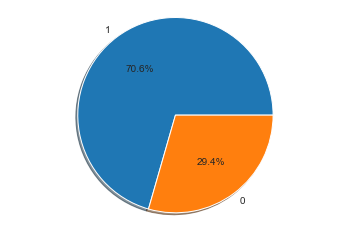

In [106]:
labels = b.index
sizes =b.values 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

# Observation 

<b>1)</b> From above graph , we can see that, pie chart that 70.6% of the customers does not have any credit card. 

<b>2)</b> 29.4% customers have credit card.

# PDF of 'IsActiveMember':

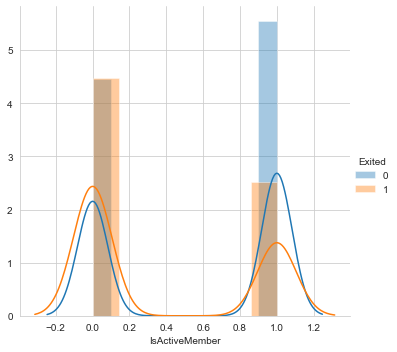

In [107]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "IsActiveMember")\
   .add_legend();
plt.show();

# Observation

<b>1)</b>  This graphical represenattion shows us, The customers being active or not active,<b>there are slightly more active customers in  bank. </b>

<b>2)</b>  28% customers of active member which they <b>wants to  staying with Bank and 15% of the active member of the Bank wants to left the Bank.</b>

# Box Plot of 'IsActiveMember':

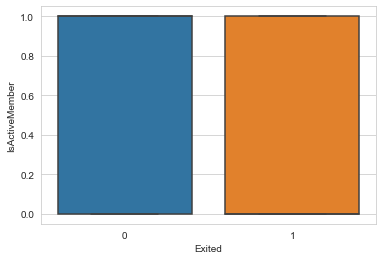

In [108]:
sns.boxplot(x='Exited',y='IsActiveMember', data=df_categorical)
plt.show()

# Observation

<b>--</b> This graphical representations of box plots shows us,<b> The distribution of an active member are equal</b> and<b> fair and at a time they staying or leaving the bank.</b>

# Violin Plot of 'IsActiveMember':

<function matplotlib.pyplot.show(close=None, block=None)>

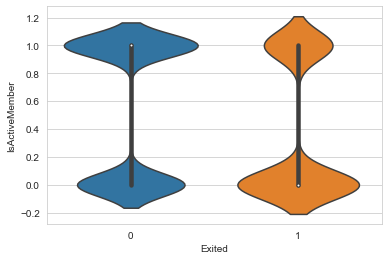

In [109]:
sns.violinplot(x='Exited',y='IsActiveMember',data=df_categorical)
plt.show

# 2] We will see 'Bivariate Analysis':

<b>1.</b> Pair Plot 

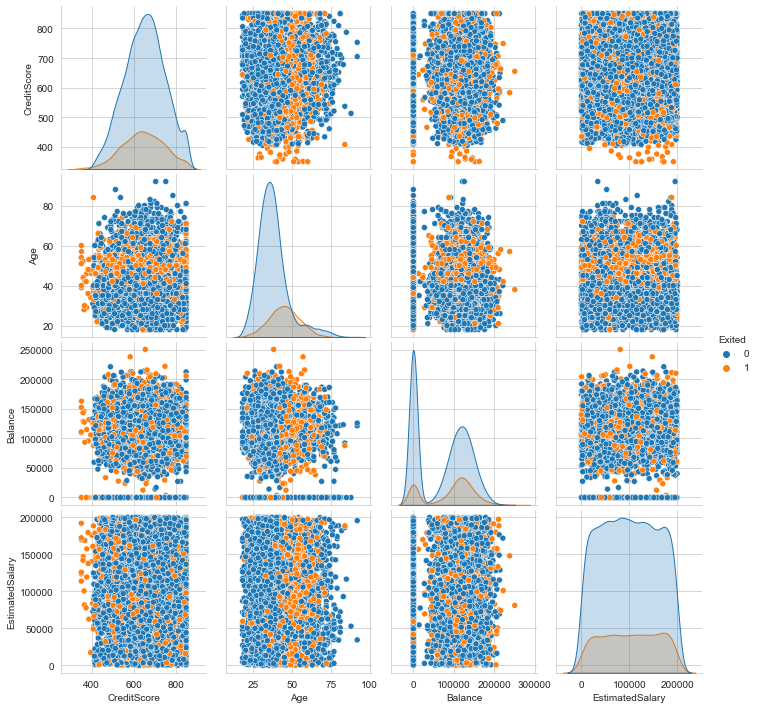

In [110]:
sns.pairplot(df_numerical,hue='Exited')

# Observation:

<b>1)</b> This graphical representation shows us<b> pair plot.</b>

<b>2)</b> We can see that the patterns which are formed between<b> 'Age' & 'CreditScore'</b> and <b>'Age' & 'EstimatedSalary'.</b>

<b>Scattering Plot Between 'CreditScore' and 'Age':</b>

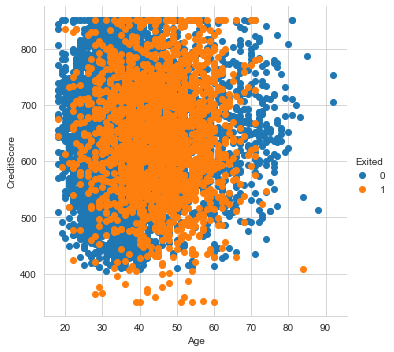

In [111]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(plt.scatter, "Age","CreditScore")\
   .add_legend();
plt.show();

# Observation

<b>--</b> This graphical representation of scattering plot show us,<b> majority of customers who have left the bank which are shown in center.</b>

<b>Scattering Plot Between 'Age' and 'EstimatedSalary':</b>

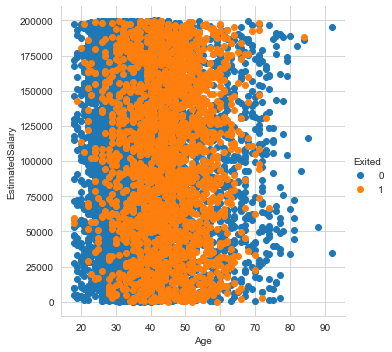

In [112]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(plt.scatter, "Age","EstimatedSalary")\
   .add_legend();
plt.show();

<b>1)</b> This graphical representation shows us,<b> the formation of a pattern in between age group 30 to 60.</b>

<b>2)</b> This graph tell us ,<b> below age 30 and above age 60 customers are more likely to stay.</b>

# Scaling of Numerical features


 <b>We will do scaling of numerical features, Means To, Normalise the features.</b>

In [113]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


In [114]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
CS= scaling.fit_transform(df_numerical[['CreditScore']])
age = scaling.fit_transform(df_numerical[['Age']])
Balance= scaling.fit_transform(df_numerical[['Balance']])

ES=scaling.fit_transform(df_numerical[['EstimatedSalary']])

df_numerical['CreditScore'] = CS

df_numerical['Age'] = age

df_numerical['Balance'] = Balance

df_numerical['EstimatedSalary'] = ES



In [115]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


# Observation:

<b>1)</b> From above<b> normalization method</b>, we can see that, they all are now in same<b> scale between 0 to 1.</b>

<b>2)</b> We used <b>'Min-Max' Scalar</b> to normalize the value.

# Mean , Median and Percentile

In [116]:
stayed = df[df['Exited']==0]

left = df[df['Exited']==1]

In [117]:
left

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [118]:
stayed

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


# Credit Score

In [121]:
# Mean
print ("Mean :")
print((np.mean(stayed['CreditScore'])),"for customers who stayed")
print((np.mean(left['CreditScore'])),"for customers who left")

Mean :
651.8531960316463 for customers who stayed
645.3514972999509 for customers who left


In [122]:
# Meadian
print ("Median :")
print((np.median(stayed['CreditScore'])),"for customers who stayed")
print((np.median(left['CreditScore'])),"for customers who left")

Median :
653.0 for customers who stayed
646.0 for customers who left


In [123]:
# Standard Deviation 
print ("Standard Deviation :")
print((np.std(stayed['CreditScore'])),"for customers who stayed")
print((np.std(left['CreditScore'])),"for customers who left")

Standard Deviation :
95.64783071535247 for customers who stayed
100.29687481012597 for customers who left


# Age

In [124]:
# Mean
print ("Mean :")
print((np.mean(stayed['Age'])),"for customers who stayed")
print((np.mean(left['Age'])),"for customers who left")

Mean :
37.40838879819164 for customers who stayed
44.8379970544919 for customers who left


In [125]:
# Meadian
print ("Median :")
print((np.median(stayed['Age'])),"for customers who stayed")
print((np.median(left['Age'])),"for customers who left")

Median :
36.0 for customers who stayed
45.0 for customers who left


In [126]:
# Standard Deviation 
print ("Standard Deviation :")
print((np.std(stayed['Age'])),"for customers who stayed")
print((np.std(left['Age'])),"for customers who left")

Standard Deviation :
10.124727115441777 for customers who stayed
9.759165198147958 for customers who left


# Balance

In [127]:
# Mean
print ("Mean :")
print((np.mean(stayed['Balance'])),"for customers who stayed")
print((np.mean(left['Balance'])),"for customers who left")

Mean :
72745.29677885193 for customers who stayed
91108.53933726063 for customers who left


In [128]:
# Meadian
print ("Median :")
print((np.median(stayed['Balance'])),"for customers who stayed")
print((np.median(left['Balance'])),"for customers who left")

Median :
92072.68 for customers who stayed
109349.29 for customers who left


# Observation 
<b>--</b> Here we can see that the difference between mean and median of Balance. It showing some outliers.

In [129]:
# Standard Deviation 
print ("Standard Deviation :")
print((np.std(stayed['Balance'])),"for customers who stayed")
print((np.std(left['Balance'])),"for customers who left")

Standard Deviation :
62844.094322747915 for customers who stayed
58346.467874478956 for customers who left


# Estimated Salary

In [130]:
# Mean
print ("Mean :")
print((np.mean(stayed['EstimatedSalary'])),"for customers who stayed")
print((np.mean(left['EstimatedSalary'])),"for customers who left")

Mean :
99738.39177194514 for customers who stayed
101465.6775306824 for customers who left


In [131]:
# Meadian
print ("Median :")
print((np.median(stayed['EstimatedSalary'])),"for customers who stayed")
print((np.median(left['EstimatedSalary'])),"for customers who left")

Median :
99645.04 for customers who stayed
102460.84 for customers who left


In [132]:
# Standard Deviation 
print ("Standard Deviation :")
print((np.std(stayed['EstimatedSalary'])),"for customers who stayed")
print((np.std(left['EstimatedSalary'])),"for customers who left")

Standard Deviation :
57401.982332801934 for customers who stayed
57898.201201044954 for customers who left


In [133]:
# steps to do

#1. joining my numerical and categorical features
#2. train, cv,test 
#3. individual algorithm
#4. testing of the performance
#5. Conclusion

In [134]:
#joining 

df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


In [135]:
# removing exited column to get rid of duplicate columns
df_categorical
df_categorical2=df_categorical.drop("Exited",axis=1)

In [136]:
df_categorical

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2,1,1,1,1,1,0,0,1,0
1,1,1,0,1,0,0,0,1,1,0
2,8,3,1,0,1,1,0,0,1,0
3,1,2,0,0,0,1,0,0,1,0
4,2,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,1,0,0,0,1
9996,10,1,1,1,0,1,0,0,0,1
9997,7,1,0,1,1,1,0,0,1,0
9998,3,2,1,0,1,0,1,0,0,1


In [137]:
#concatinating 2 dataframes
df_concat2 = pd.concat([df_categorical2,df_numerical], axis=1)

df_concat2

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary,Exited
0,2,1,1,1,1,0,0,1,0,0.538,0.324324,0.000000,0.506735,1
1,1,1,0,1,0,0,1,1,0,0.516,0.310811,0.334031,0.562709,0
2,8,3,1,0,1,0,0,1,0,0.304,0.324324,0.636357,0.569654,1
3,1,2,0,0,1,0,0,1,0,0.698,0.283784,0.000000,0.469120,0
4,2,1,1,1,0,0,1,1,0,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,1,0,0,0,1,0.842,0.283784,0.000000,0.481341,0
9996,10,1,1,1,1,0,0,0,1,0.332,0.229730,0.228657,0.508490,0
9997,7,1,0,1,1,0,0,1,0,0.718,0.243243,0.000000,0.210390,1
9998,3,2,1,0,0,1,0,0,1,0.844,0.324324,0.299226,0.464429,1


In [138]:
#sepearting features from classlabels
X=df_concat2.iloc[:,0:13]

In [139]:
X

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary
0,2,1,1,1,1,0,0,1,0,0.538,0.324324,0.000000,0.506735
1,1,1,0,1,0,0,1,1,0,0.516,0.310811,0.334031,0.562709
2,8,3,1,0,1,0,0,1,0,0.304,0.324324,0.636357,0.569654
3,1,2,0,0,1,0,0,1,0,0.698,0.283784,0.000000,0.469120
4,2,1,1,1,0,0,1,1,0,1.000,0.337838,0.500246,0.395400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,1,0,0,0,1,0.842,0.283784,0.000000,0.481341
9996,10,1,1,1,1,0,0,0,1,0.332,0.229730,0.228657,0.508490
9997,7,1,0,1,1,0,0,1,0,0.718,0.243243,0.000000,0.210390
9998,3,2,1,0,0,1,0,0,1,0.844,0.324324,0.299226,0.464429


In [140]:
Y=df_concat2.iloc[:,13:]

In [141]:
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [142]:
#train test split
#spliting the data into train and test
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [143]:
X_train.shape

(8000, 13)

In [144]:
y_train.shape

(8000, 1)

In [145]:
X_test.shape

(2000, 13)

In [146]:
y_test.shape

(2000, 1)

# Modelling 

# KNN(K NEAREST NEIGHBOUR)

<b>Here we apply KNN algorithm and check the performance.</b>

In [147]:
#applying knn

# knn(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create KNN classifier

hyper_parameter_k=[{'n_neighbors':[3,5,7,9]}]
clf= KNeighborsClassifier()
modelknn=GridSearchCV( clf,hyper_parameter_k,scoring='accuracy')

modelknn.fit(X_train,y_train)

print(modelknn.best_estimator_)
print("training accuracy is",modelknn.score(X_train,y_train))
print("testing accuracy is ",modelknn.score(X_test,y_test))
# Fit the classifier to the data

KNeighborsClassifier(n_neighbors=7)
training accuracy is 0.847625
testing accuracy is  0.8165


In [149]:
#PREDICTIONS
knn_test_prediction=modelknn.predict(X_test)#this is your y_pred_test
knn_train_predictions=modelknn.predict(X_train)#y_pred_train

In [150]:
#evaluation
from sklearn.metrics import f1_score
X_knntest_F1score=f1_score(y_test,knn_test_prediction)
print("Testing f1 score is",X_knntest_F1score) #f1 score on test data

X_knntrain_F1score=f1_score(y_train,knn_train_predictions)
print("Training f1 score is",X_knntrain_F1score) #f1 score on train data

Testing f1 score is 0.34111310592459604
Training f1 score is 0.5098512263771612


In [151]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_knn_cf=confusion_matrix(y_test,knn_test_prediction)
print(x_knn_cf)

[[1538   69]
 [ 298   95]]


Test confusion matrix


<AxesSubplot:>

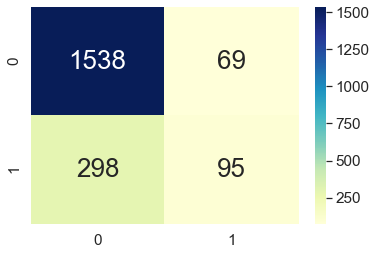

In [152]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_knn_cf, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [153]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_knn_cf_train=confusion_matrix(y_train,knn_train_predictions)
print(x_knn_cf)

[[1538   69]
 [ 298   95]]


Train confusion matrix


<AxesSubplot:>

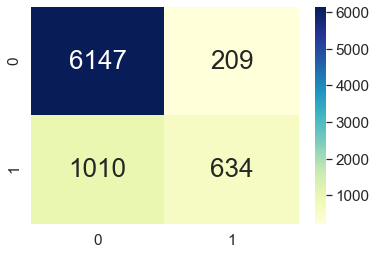

In [154]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_knn_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [155]:
#Precison
#training data
from sklearn.metrics import precision_score
x_knn_p=precision_score(y_train,knn_train_predictions)
print("The precision of x_knn_p for training data",x_knn_p)

The precision of x_knn_p for training data 0.7520759193357058


In [156]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_knn_p_test=precision_score(y_test,knn_test_prediction)
print("The precision of x_knn_p for testing data",x_knn_p_test)

The precision of x_knn_p for testing data 0.5792682926829268


In [157]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_knn_r_test=recall_score(y_test,knn_test_prediction)
print("The recall of test data for knn is",x_knn_r_test)

The recall of test data for knn is 0.24173027989821882


In [158]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_knn_r_train=recall_score(y_train,knn_train_predictions)
print("The recall of training data for knn is",x_knn_r_train)



The recall of training data for knn is 0.38564476885644766


In [159]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_knn_r_train=recall_score(y_train,knn_train_predictions)
print("The recall of training data for knn is",x_knn_r_train)


The recall of training data for knn is 0.38564476885644766


In [160]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,knn_train_predictions)

print("training accuracy is",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,knn_test_prediction)

print("testing accuracy is",b)


training accuracy is 0.847625
testing accuracy is 0.8165


# Logistic Regression

In [161]:
#we are using simple gridsearchcv to tune the hyperparameter C
#here we are not using smote samples

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]

LRmodel=GridSearchCV(LogisticRegression(max_iter=400,class_weight='balanced'),tuned_parameters)

LRmodel.fit(X_train,y_train)

print(LRmodel.best_estimator_)
print(LRmodel.score(X_test,y_test))
print(LRmodel.score(X_train,y_train))

#this is accuracy 

LogisticRegression(C=100, class_weight='balanced', max_iter=400)
0.7195
0.70775


# SVM(SUPPORT VECTOR MACHINES)

In [162]:
#svm(support vector machine)
from sklearn import svm
tuned_parameters=[{'C':[0.001, 0.01, 0.1, 1, 10]}]
clf= svm.SVC(kernel='rbf')
smodel=GridSearchCV(clf,tuned_parameters,cv=3)

smodel.fit(X_train,y_train)

print(smodel.best_estimator_)
print(smodel.score(X_test,y_test))
# Fit the classifier to the data

SVC(C=10)
0.83


# DECISION TREE

In [164]:
from sklearn import tree
tuned_parameters=[{'max_depth':[4,5,6]}]

clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=42)


model=GridSearchCV(clf,tuned_parameters)

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=42)
0.8595
0.865875


# RANDOM FOREST

In [165]:
#Training random forest after applying SMOTE technique.
#here we are using GridSearchCV to tune the hyperparamters we have in randomforest to see which 
# parameters works best.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200,300, 500],
    'max_depth' : [4,5,6]
}
rfc=RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

In [166]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 6, 'n_estimators': 500}


In [167]:
#training the random forest model
rfc_new=RandomForestClassifier(criterion= 'entropy', max_depth= 6, max_features= 'auto', n_estimators=500,random_state=42)
random_forest_model=rfc_new.fit(X_train,y_train)

In [168]:
#predictions
rf_predictions_test=random_forest_model.predict(X_test)
rf_predictions_train=random_forest_model.predict(X_train)

In [169]:
#evaluation of random forest with smote
from sklearn.metrics import f1_score
X_test_F1score=f1_score(y_test,rf_predictions_test)
print("Testing f1 score is",X_test_F1score) #f1 score on test data

X_train_F1score=f1_score(y_train,rf_predictions_train)
print("Training f1 score is",X_train_F1score) #f1 score on train data

Testing f1 score is 0.4686346863468635
Training f1 score is 0.515032679738562


In [170]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_rf_train=confusion_matrix(y_train,rf_predictions_train)
print(x_rf_train)

[[6296   60]
 [1053  591]]


In [171]:
from sklearn.metrics import confusion_matrix
x_rf_test=confusion_matrix(y_test,rf_predictions_test)
print(x_rf_test)

[[1585   22]
 [ 266  127]]


In [175]:
from prettytable import PrettyTable
columns=(["ALGORITHM", "ACCURACY","F1","PRECISION","RECALL"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["KNN","Logistic Regression","SVM", "DECISION TREE" ,"Random Forest"])
myTable.add_column(columns[1], [" 48%"," 73.5%","71.61%", "87%", "51.2%"])
myTable.add_column(columns[2], ["28.6% ","23.5%","55.7%", "78.5%","51%"])
myTable.add_column(columns[3], ["28.6% ","23.5%","55.7%", "78.5%","51%"])
myTable.add_column(columns[4], ["28.6% ","23.5%","55.7%", "78.5%","51%"])


print(myTable)

ModuleNotFoundError: No module named 'prettytable'

# Conclusion of the Project

we have seen random forest is giving the best accuracy and f2 score so we can use this algorithm
for the production